# D-MART SALES

### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### READING THE DATASET

In [2]:
dataset = pd.read_excel("DT-Mart.xlsx")
dataset.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
0,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0,1
1,2015-01-02,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0,1
2,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,215.686275,142.098039,145.098039,70.588235,0.0,145.098039,3.0,1
3,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0,1
4,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0,1


In [3]:
# Checking number of rows and columns in dataset
dataset.shape

(6428, 18)

In [4]:
# Checking the columns present in the dataset
dataset.columns

Index(['Order Date', 'Order Priority', 'Ship Type', 'City', 'State', 'Country',
       'Region', 'Segment', 'Super Category', 'Category', 'Price',
       'Operational/ Production Cost', 'Selling Price', 'Discount',
       'Shipping Cost', 'Sales (shipping price included)', 'Profit',
       'Quantity'],
      dtype='object')

In [5]:
# Getting the brief overview of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order Date                       6428 non-null   datetime64[ns]
 1   Order Priority                   6428 non-null   object        
 2   Ship Type                        6428 non-null   object        
 3   City                             6428 non-null   object        
 4   State                            6428 non-null   object        
 5   Country                          6428 non-null   object        
 6   Region                           6428 non-null   object        
 7   Segment                          6428 non-null   object        
 8   Super Category                   6428 non-null   object        
 9   Category                         6428 non-null   object        
 10  Price                            6428 non-null   float64    

### MISSING VALUES

In [6]:
# making the list of features which has missing values
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

# printing the features and percentage of missing values
for feature in features_with_na:
    print(f"The {feature} has {dataset[feature].isnull().sum()} null values")
    print(f"The {feature} has {round(dataset[feature].isnull().mean(),2)}% null values")

The Operational/ Production Cost has 1400 null values
The Operational/ Production Cost has 0.22% null values


### NUMERICAL COLUMNS

In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != "O"]
print("The number of numerical features are:",len(numerical_features))

# visualizing the numeric variables
dataset[numerical_features].head()

The number of numerical features are: 9


,Order Date,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
0,2015-01-02,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0,1
1,2015-01-02,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0,1
2,2015-01-02,215.686275,142.098039,145.098039,70.588235,0.0,145.098039,3.0,1
3,2015-01-02,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0,1
4,2015-01-02,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0,1


### TEMPORAL DATA
By extracting the numerical features,we can observe that the column **Order Date** is datetime variable

In [8]:
# Extracting the year from Order Date column
data = dataset.copy()
data["Year"] = data["Order Date"].dt.year
data.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity,Year
0,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0,1,2015
1,2015-01-02,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0,1,2015
2,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,215.686275,142.098039,145.098039,70.588235,0.0,145.098039,3.0,1,2015
3,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0,1,2015
4,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0,1,2015


In [9]:
# list of variables containing date information
date_features = [feature for feature in data.columns if "Date" in feature or "Year" in feature]
print(date_features)

['Order Date', 'Year']


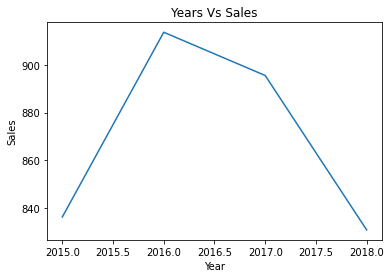

In [10]:
# Analyzing the datetime variable
# Checking the relationship between year and sales

data.groupby("Year")["Sales (shipping price included)"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Years Vs Sales")
plt.show()

#### OBSERVATIONS:
The average sales is maximum during the year **2016** as compared to other years

#### NUMERICAL VARIABLES ARE OF TWO TYPES:
- DISCRETE VARIABLES AND CONTINUOUS VARIABLES

### DISCRETE VARIABLES

In [11]:
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) <25 and feature not in date_features ]
discrete_features

['Quantity']

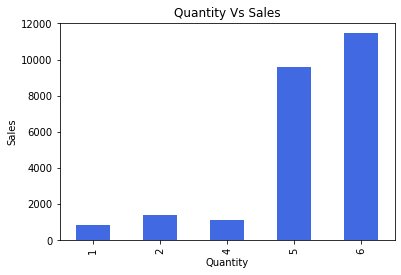

In [12]:
dataset.groupby("Quantity")["Sales (shipping price included)"].mean().plot.bar(color='royalblue')
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity Vs Sales")
plt.show()

#### OBSERVATIONS:
The sales sees growth with increase in quantity but there is decrease in product sales when the quantity of amount purchased becomes 4.

### CONTINUOUS VARIABLES

In [13]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in date_features]
print("The number of continuous features:",len(continuous_features))

# visualizing the continuous features
dataset[continuous_features].head()

The number of continuous features: 7


,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit
0,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0
1,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0
2,215.686275,142.098039,145.098039,70.588235,0.0,145.098039,3.0
3,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0
4,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0


### Boxplot – All Numeric Variables

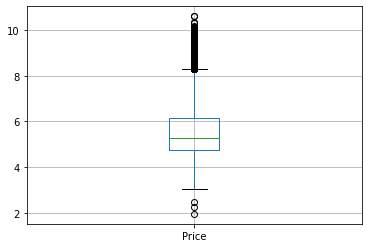

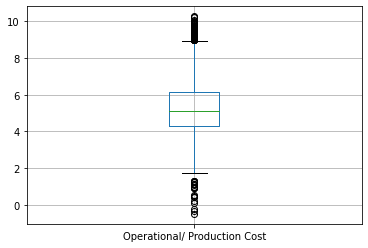

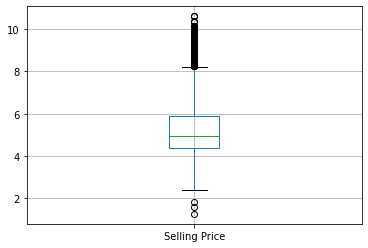

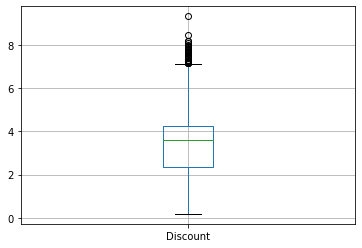

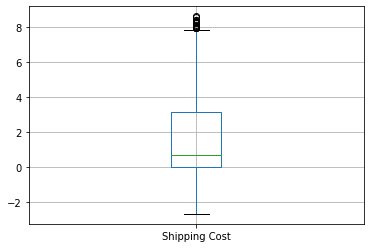

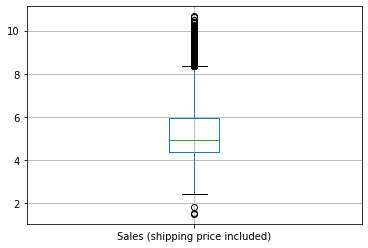

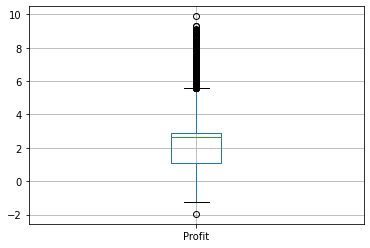

In [14]:
for feature in continuous_features:
    data = dataset.copy()
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.show()

#### Observations:
There are outliers present in present in all the numerical categorical that affects the data.

### Histogram – All Numeric Variables¶

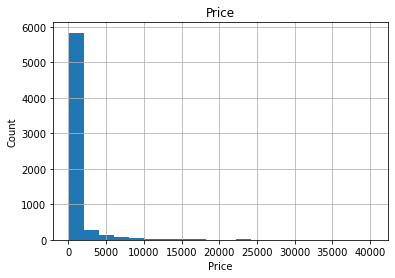

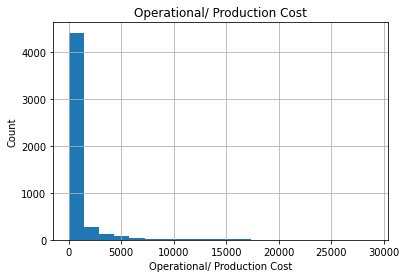

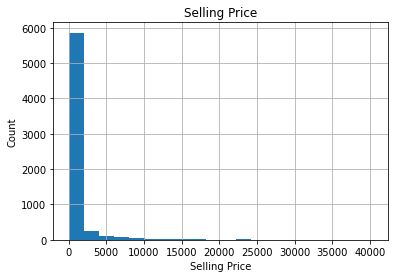

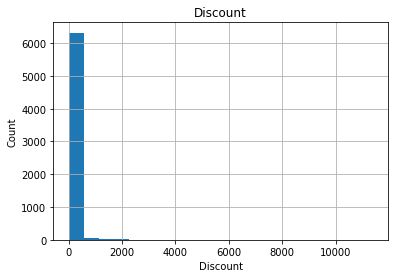

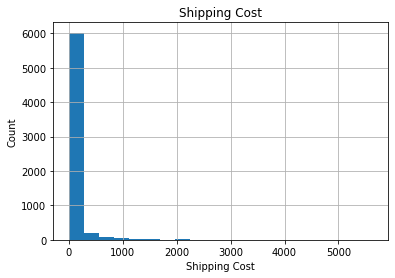

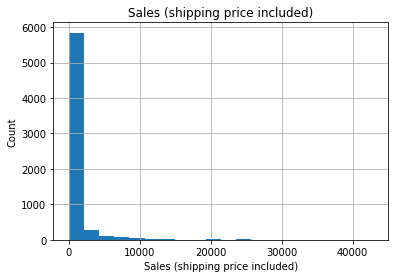

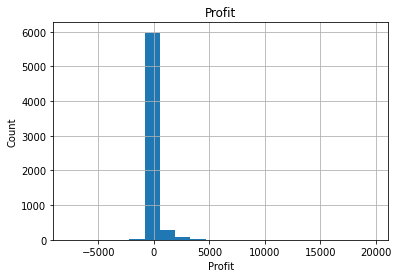

In [15]:
for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins = 20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### OBSERVATIONS:
All the categories are right skewed except the profit category which is normally distributed.

### Distribution Plot – All Numeric Variables

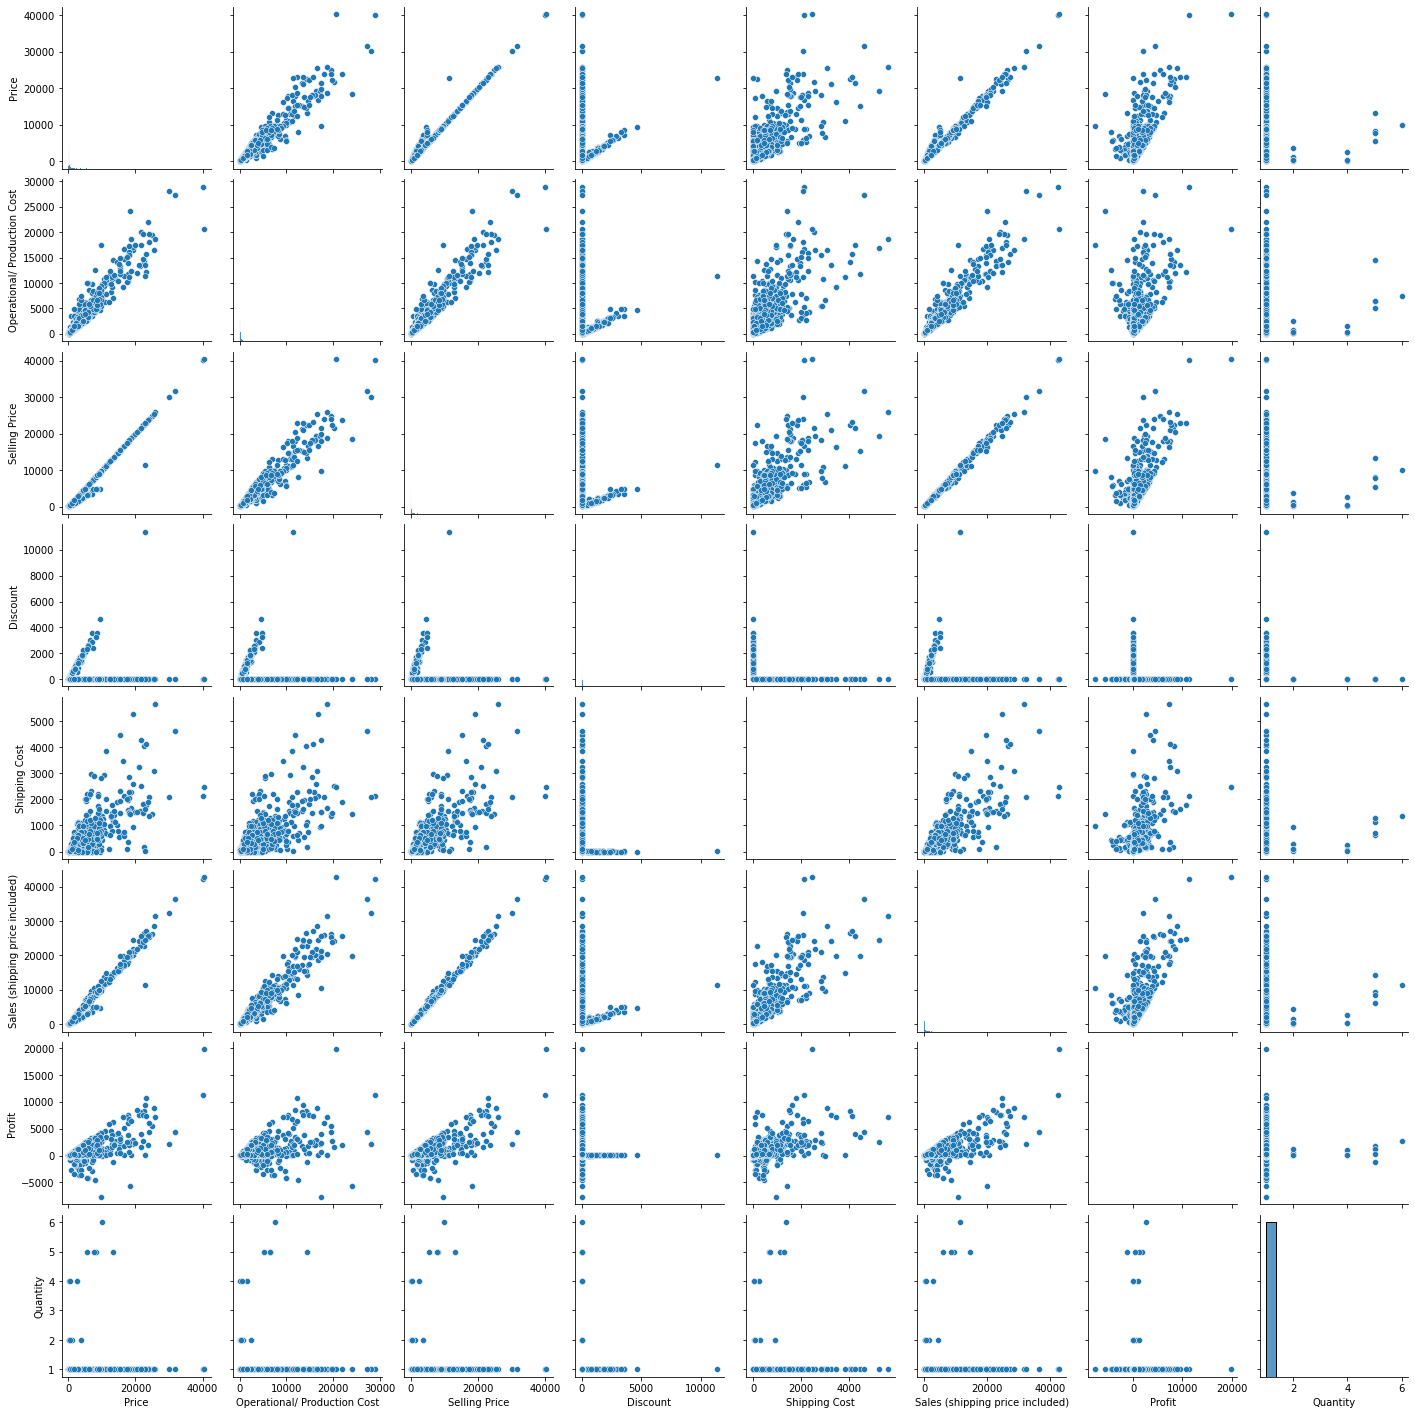

In [16]:
sns.pairplot(dataset)

### Aggregation for all numerical Columns

In [17]:
dataset.describe()

,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
count,6428.000000,5028.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000
mean,876.516801,801.573313,795.291310,81.225491,70.878435,865.233384,137.115094,1.005445
std,2412.198794,2149.972447,2390.710076,247.240296,293.157801,2639.154865,696.420860,0.137103
min,7.058824,-13.470588,3.529412,0.000000,-6.238900,4.529412,-7698.942800,1.000000
25%,117.549020,72.196078,78.431373,10.515000,0.000000,80.333333,3.000000,1.000000
50%,197.671640,161.274510,137.880041,36.911765,1.000000,140.441176,14.000000,1.000000
75%,479.901961,467.496900,367.615065,71.568627,2.000000,391.028056,18.000000,1.000000
max,40395.405400,28953.823600,40388.395400,11401.176471,5639.825400,42854.863900,19747.099900,6.000000


### Unique Values across all columns

In [18]:
for feature in dataset:
    print(f"The {feature} has {len(dataset[feature].unique())} unique values")

The Order Date has 371 unique values
The Order Priority has 4 unique values
The Ship Type has 4 unique values
The City has 294 unique values
The State has 67 unique values
The Country has 9 unique values
The Region has 3 unique values
The Segment has 3 unique values
The Super Category has 31 unique values
The Category has 137 unique values
The Price has 3156 unique values
The Operational/ Production Cost has 2930 unique values
The Selling Price has 2293 unique values
The Discount has 870 unique values
The Shipping Cost has 1362 unique values
The Sales (shipping price included) has 2893 unique values
The Profit has 1410 unique values
The Quantity has 5 unique values


### DUPLICATE VALUES ACROSS ALL COLUMNS

In [19]:
for feature in dataset:
    duplicateDFRow = dataset[dataset.duplicated([feature])]
    print(f"The {feature} has {len(duplicateDFRow)} number of duplicate values" )

The Order Date has 6057 number of duplicate values
The Order Priority has 6424 number of duplicate values
The Ship Type has 6424 number of duplicate values
The City has 6134 number of duplicate values
The State has 6361 number of duplicate values
The Country has 6419 number of duplicate values
The Region has 6425 number of duplicate values
The Segment has 6425 number of duplicate values
The Super Category has 6397 number of duplicate values
The Category has 6291 number of duplicate values
The Price has 3272 number of duplicate values
The Operational/ Production Cost has 3498 number of duplicate values
The Selling Price has 4135 number of duplicate values
The Discount has 5558 number of duplicate values
The Shipping Cost has 5066 number of duplicate values
The Sales (shipping price included) has 3535 number of duplicate values
The Profit has 5018 number of duplicate values
The Quantity has 6423 number of duplicate values


### Correlation – Heatmap - All Numeric Variables

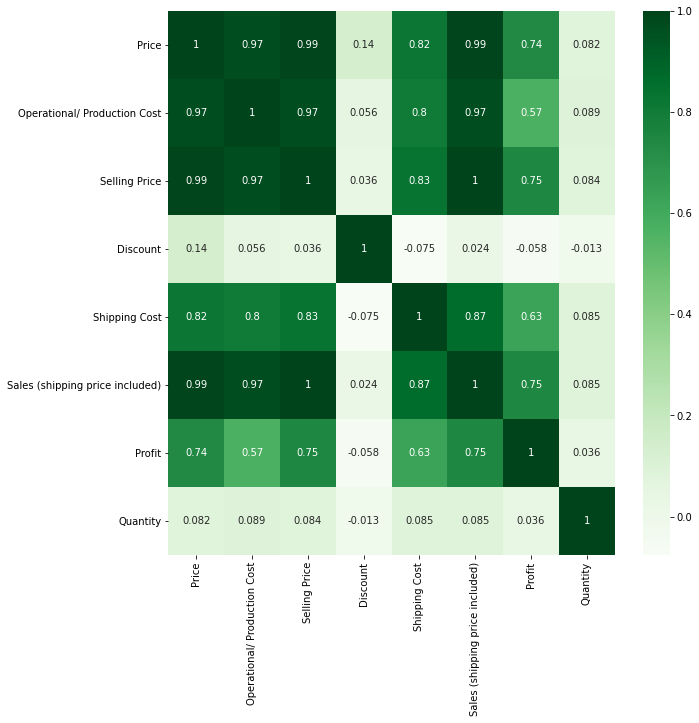

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(),annot = True, cmap = "Greens")
plt.show()

#### OBSERVATIONS:
We can observe huge correlation between the columns in the dataset which can cause multicollinearity.

### Regression Plot - All Numeric Variables

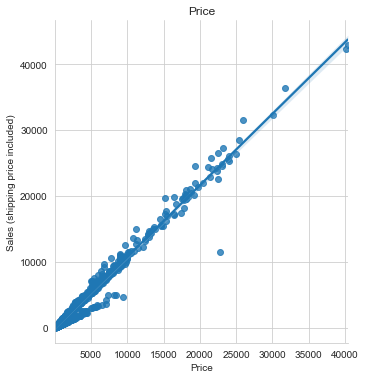

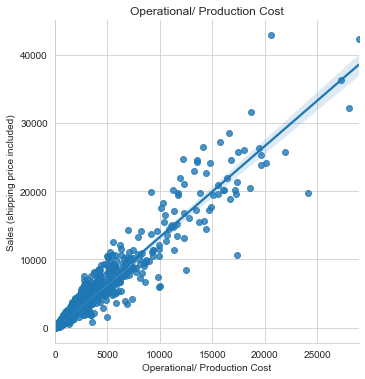

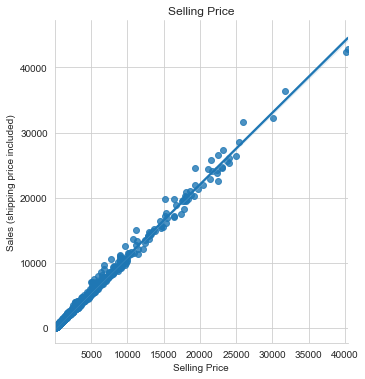

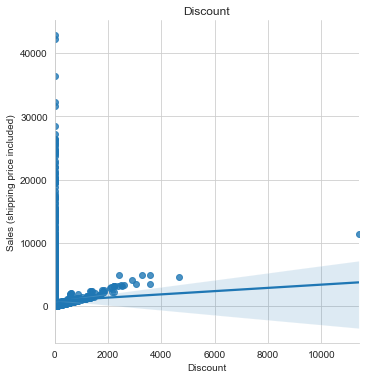

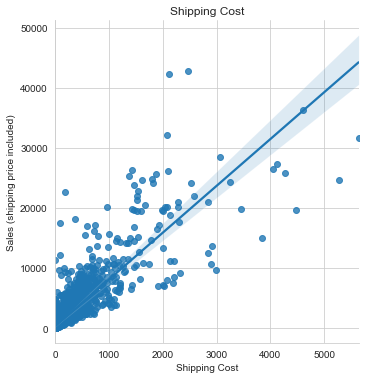

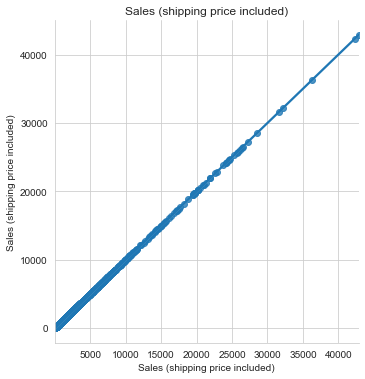

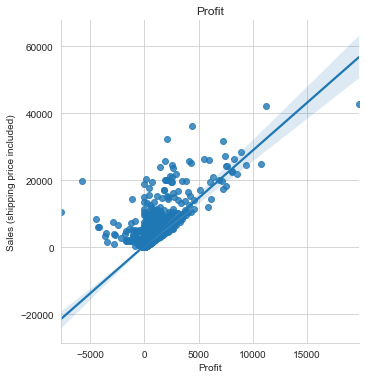

In [21]:
for feature in continuous_features:
    sns.set_style('whitegrid')
    sns.lmplot(x =feature, y ="Sales (shipping price included)", data = dataset)
    plt.title(feature)
    plt.show()

### Bar Plot – Every Categorical Variable vs Numerical Variable

In [22]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"]
print("The number of categorical features :",len(categorical_features))

dataset[categorical_features].head()

The number of categorical features : 9


,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category
0,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts
1,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Baby Care,Baby & Kids Gifts
2,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Baby Care,Baby & Kids Gifts
3,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts
4,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts


In [23]:
for feature in categorical_features:
    print(f"The feature is {feature} and number of categories are {len(dataset[feature].unique())} ")

The feature is Order Priority and number of categories are 4 
The feature is Ship Type and number of categories are 4 
The feature is City and number of categories are 294 
The feature is State and number of categories are 67 
The feature is Country and number of categories are 9 
The feature is Region and number of categories are 3 
The feature is Segment and number of categories are 3 
The feature is Super Category and number of categories are 31 
The feature is Category and number of categories are 137 


In [24]:
categorical_features_1 = [feature for feature in categorical_features if len(dataset[feature].unique())<10]
categorical_features_1

['Order Priority', 'Ship Type', 'Country', 'Region', 'Segment']

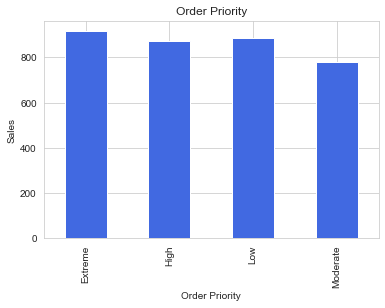

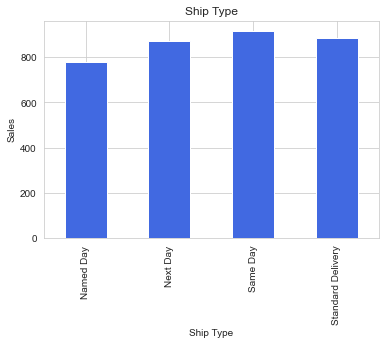

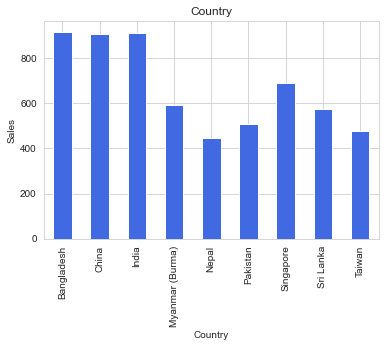

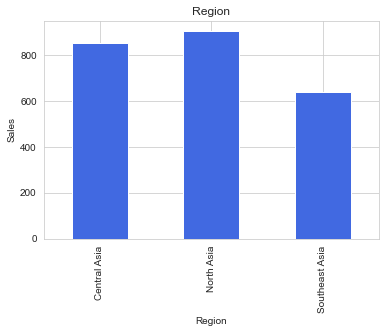

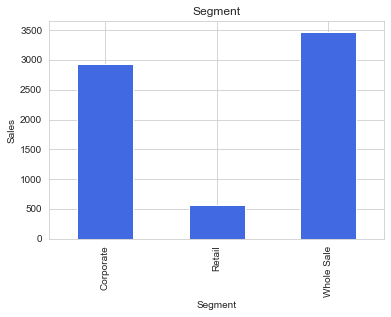

In [25]:
for feature in categorical_features_1:
    data = dataset.copy()
    data.groupby(feature)["Sales (shipping price included)"].mean().plot.bar(color = "royalblue")
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.title(feature)
    plt.show()

In [26]:
categorical_features_2 = [feature for feature in categorical_features if feature not in categorical_features_1]
categorical_features_2

['City', 'State', 'Super Category', 'Category']

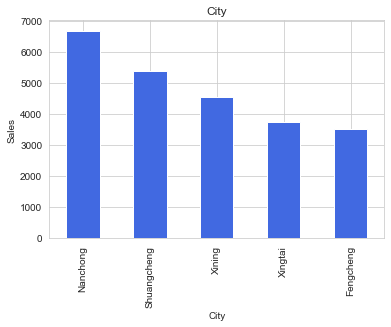

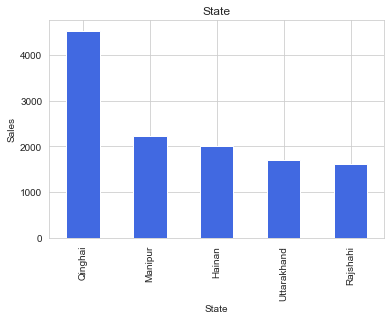

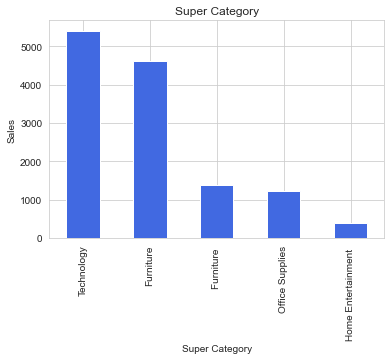

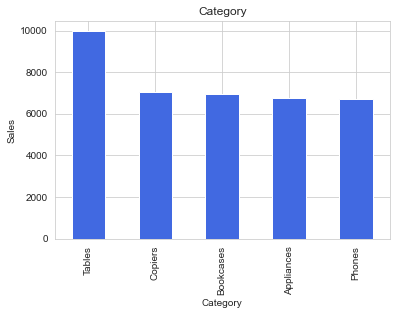

In [27]:
for feature in categorical_features_2:
    dataset.groupby(feature)["Sales (shipping price included)"].mean().sort_values(ascending = False).head().plot.bar(color = "royalblue")
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.title(feature)
    plt.show()

### Pair plot - All Numeric Variables

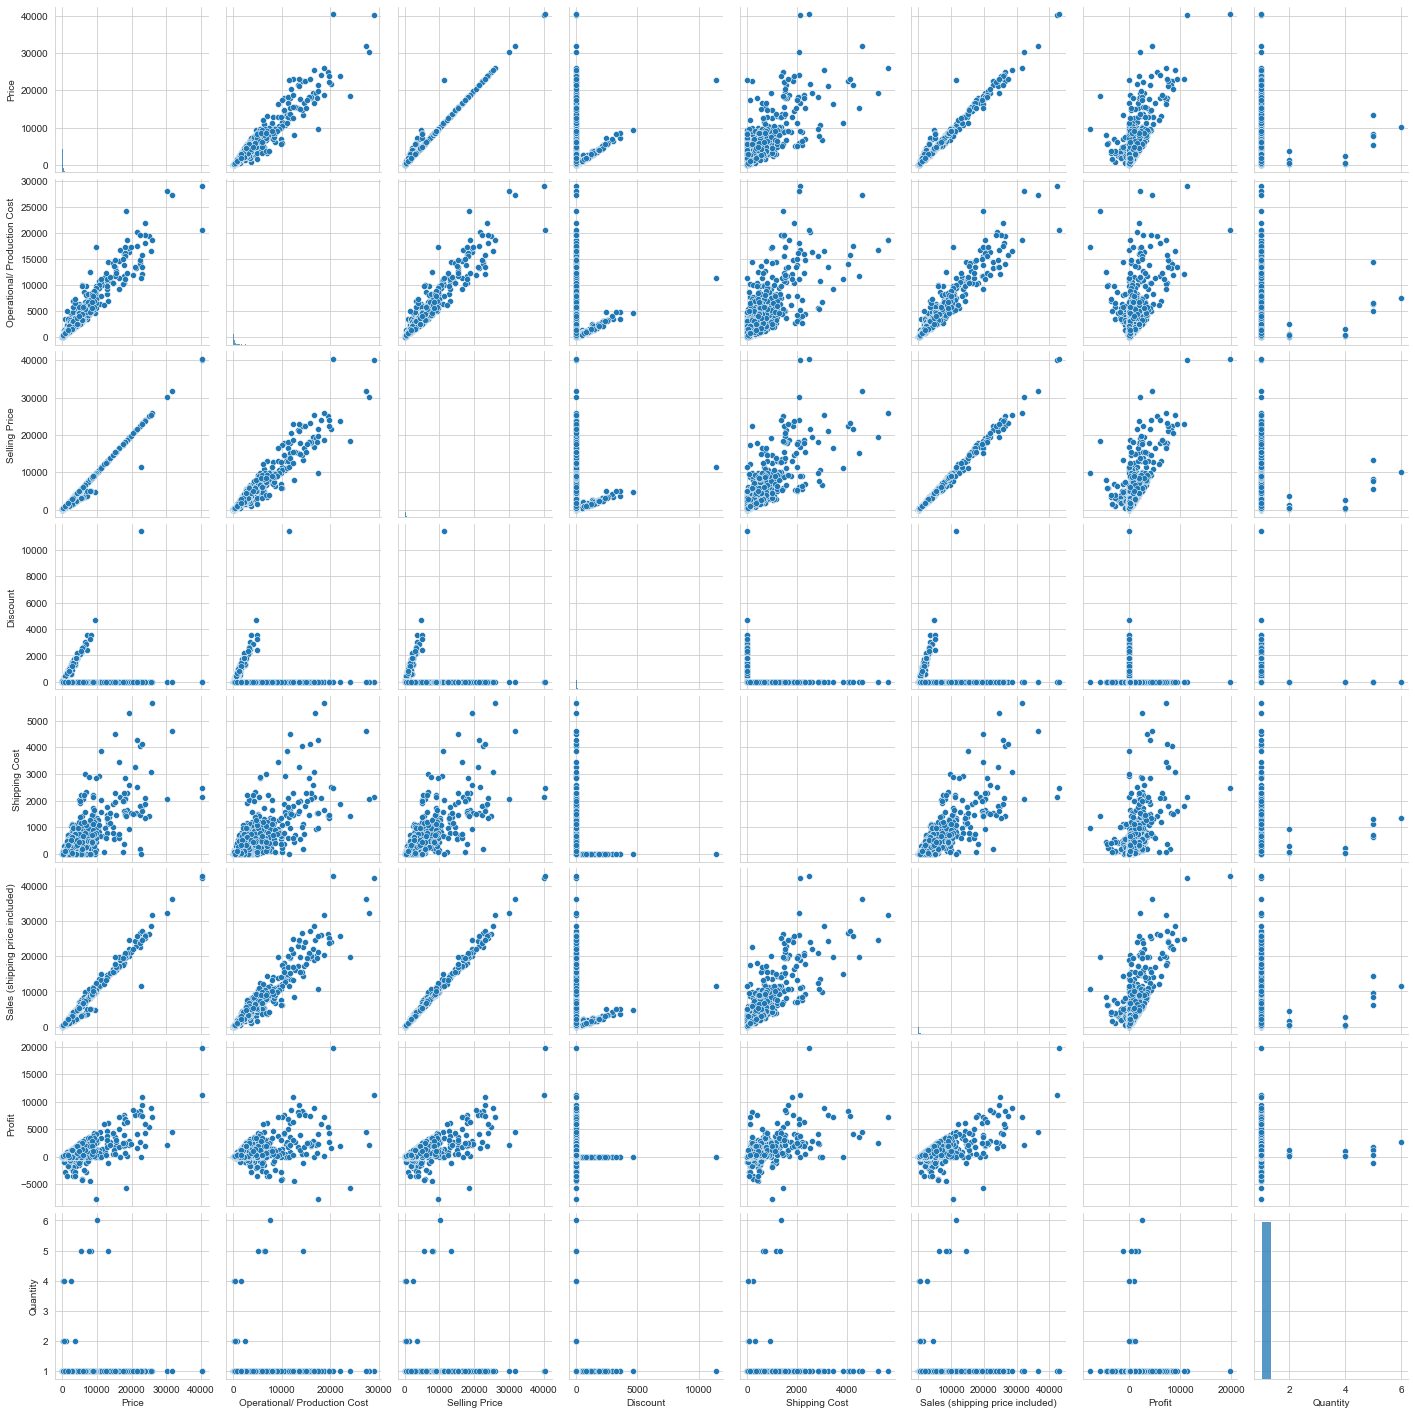

In [28]:
sns.pairplot(dataset)

### Line chart to show the trend of data - All Numeric/Date Variables

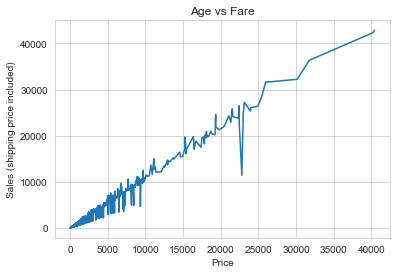

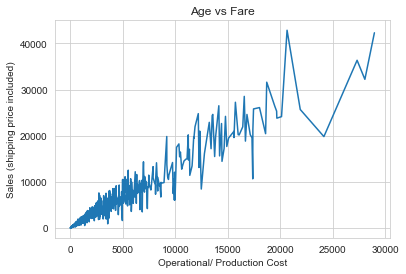

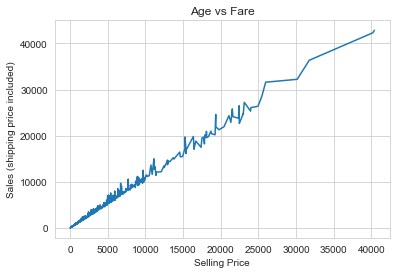

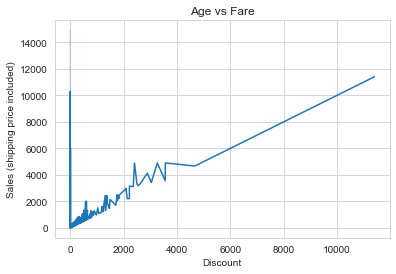

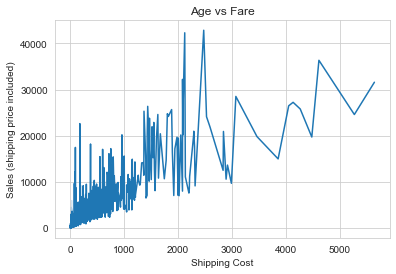

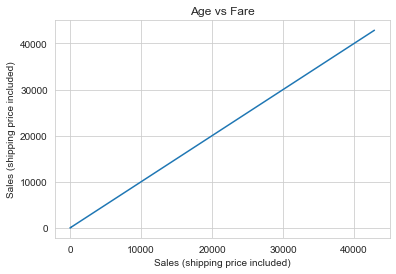

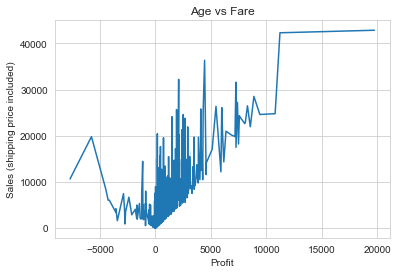

In [29]:
for feature in continuous_features:
    sns.lineplot(x= dataset[feature], y=dataset["Sales (shipping price included)"])
    plt.title('Age vs Fare')
    plt.show()

### Plotting the skewness - All Numeric Variables 

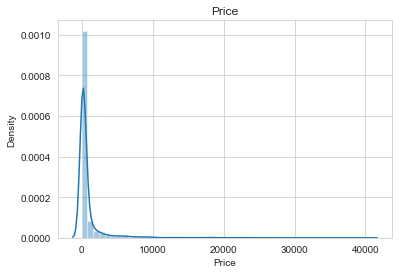

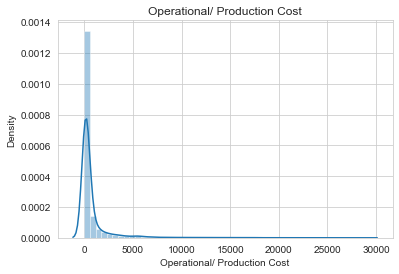

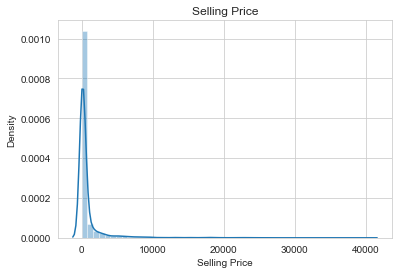

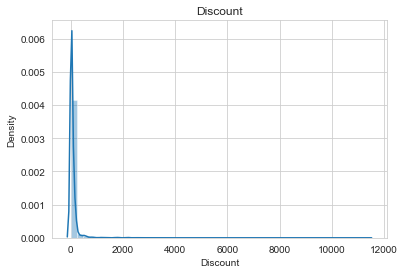

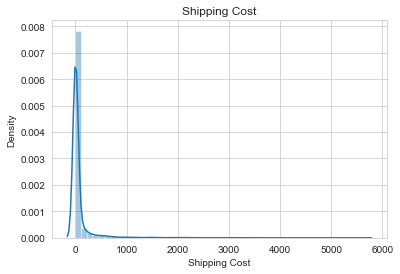

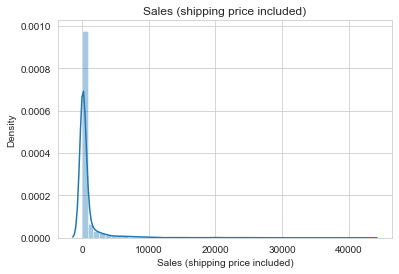

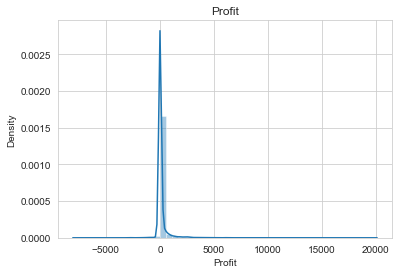

In [30]:
for feature in continuous_features:
    sns.distplot(dataset[feature])
    plt.title(feature) 
    plt.show()

#### OBSERVATIONS:
All the categories are right skewed except the profit category which is normally distributed.

### Certain dates in a month that generate more sales consistently

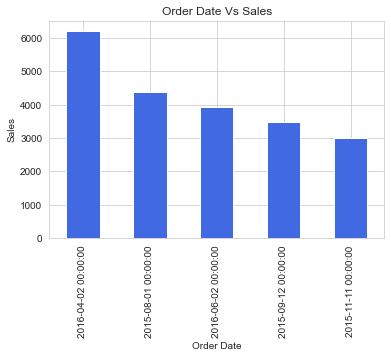

In [31]:
dataset.groupby("Order Date")["Sales (shipping price included)"].mean().sort_values(ascending = False).head().plot.bar(color = "royalblue")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Order Date Vs Sales")
plt.show()


### Top 5 performing cities in terms of Sales 


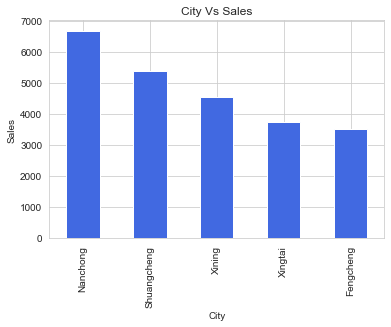

In [32]:
dataset.groupby("City")["Sales (shipping price included)"].mean().sort_values(ascending = False).head().plot.bar(color = "royalblue")
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City Vs Sales")
plt.show()


### Top 5 performing cities in terms of Profit

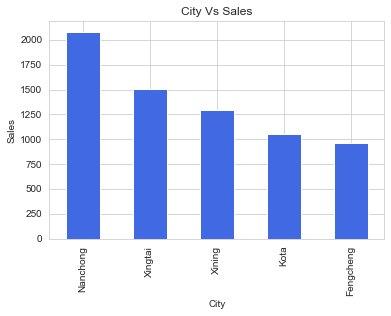

In [33]:
dataset.groupby("City")["Profit"].mean().sort_values(ascending = False).head().plot.bar(color = "royalblue")
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City Vs Sales")
plt.show()


### Top 5 Performing Segments in terms of sales

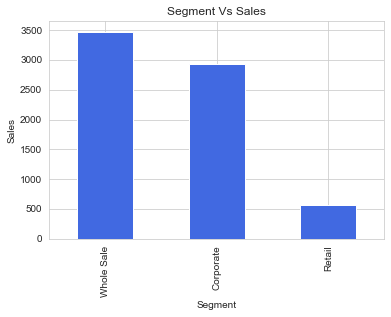

In [34]:
dataset.groupby("Segment")["Sales (shipping price included)"].mean().sort_values(ascending = False).head().plot.bar(color = "royalblue")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.title("Segment Vs Sales")
plt.show()

### Average profit across all categories

In [35]:
dataset.groupby("Super Category")["Profit"].mean().sort_values(ascending = False)

Super Category
Technology                            1034.882179
Furniture                              690.125734
Office Supplies                        241.664965
Watches                                 16.000000
Health & Personal Care Appliances       15.909091
Computers                               15.737226
Automotive                              15.724409
Cameras & Accessories                   15.639344
Home Entertainment                      15.600000
Mobiles & Accessories                   15.444251
Jewellery                               15.429464
Gaming                                  15.400000
Home Furnishing                         15.383673
Home Improvement                        15.277778
Eyewear                                  4.333333
Bags, Wallets & Belts                    4.272727
Furniture                                4.181818
Home & Kitchen                           4.181818
Toys & School Supplies                   4.129032
Beauty and Personal Care           

### Average sales across all categories?

In [36]:
dataset.groupby("Super Category")["Sales (shipping price included)"].mean().sort_values(ascending = False)

Super Category
Technology                            5405.067497
Furniture                             4611.852709
Furniture                             1390.853832
Office Supplies                       1235.347895
Home Entertainment                     390.105882
Gaming                                 350.498039
Home & Kitchen                         335.600713
Home Decor & Festive Needs             332.542986
Computers                              300.991985
Home Furnishing                        259.013365
Health & Personal Care Appliances      256.370766
Mobiles & Accessories                  198.759548
Beauty and Personal Care               178.068161
Kitchen & Dining                       171.701716
Automotive                             169.684267
Bags, Wallets & Belts                  168.960784
Eyewear                                167.274510
Food & Nutrition                       164.490196
Baby Care                              161.257497
Home Improvement                   

###  States that provide more discount and average sales trend of that state in the last 6 months? 


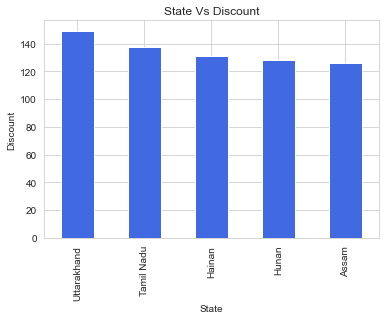

In [37]:
dataset.groupby("State")["Discount"].mean().sort_values(ascending = False).head().plot.bar(color = "royalblue")
plt.xlabel("State")
plt.ylabel("Discount")
plt.title("State Vs Discount")
plt.show()

### Trend of Profit vs Sales in the last 12 months 


In [38]:
data = dataset.copy()
data["Year"] = data["Order Date"].dt.year
data.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity,Year
0,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0,1,2015
1,2015-01-02,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0,1,2015
2,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,215.686275,142.098039,145.098039,70.588235,0.0,145.098039,3.0,1,2015
3,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0,1,2015
4,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0,1,2015


In [39]:
df1 = data[data["Year"]==2018]
df1.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity,Year
4356,2018-01-01,Low,Standard Delivery,Hangzhou,Zhejiang,China,North Asia,Retail,Jewellery,"Bangles, Bracelets & Armlets",146.764706,84.843137,97.843137,48.921569,2.0000,99.843137,13.0000,1,2018
4357,2018-01-01,Low,Standard Delivery,Hangzhou,Zhejiang,China,North Asia,Retail,Computers,Network Components,2131.372549,1253.627451,1268.627451,862.745098,0.0000,1268.627451,15.0000,1,2018
4358,2018-01-01,Low,Standard Delivery,Hangzhou,Zhejiang,China,North Asia,Retail,Clothing,Women's Clothing,107.352941,NaN,76.470588,30.882353,2.0000,78.470588,3.0000,1,2018
4359,2018-01-01,Low,Standard Delivery,Hangzhou,Zhejiang,China,North Asia,Retail,Office Supplies,Labels,335.568700,281.381400,328.558700,7.010000,39.3962,360.944900,47.1773,1,2018
4360,2018-01-03,Low,Standard Delivery,Asansol,West Bengal,India,Central Asia,Retail,Computers,Laptop Accessories,205.686275,119.156863,137.156863,68.529412,1.0000,138.156863,18.0000,1,2018


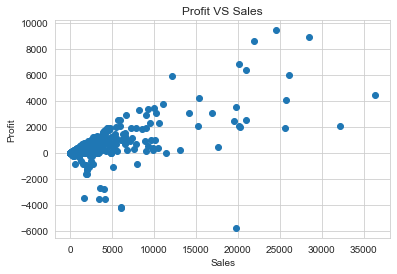

In [40]:
plt.scatter(x="Sales (shipping price included)",y="Profit",data=df1)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Profit VS Sales")
plt.show()

### Impact of quantities on the sales and cities where selling more quantities is reducing the sales.

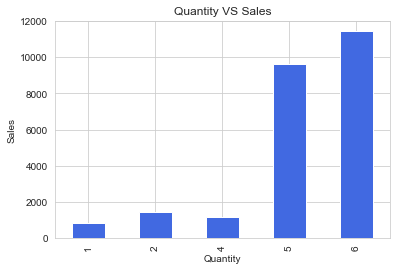

In [41]:
dataset.groupby("Quantity")["Sales (shipping price included)"].mean().plot.bar(color = "royalblue")
plt.ylabel("Sales")
plt.title("Quantity VS Sales")
plt.show()

In [42]:
df2=dataset[dataset["Quantity"]==4]
df2

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
24,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Corporate,Office Supplies,Appliances,2469.9735,1492.7795,2469.9735,0.00,239.3915,2709.3650,977.194,4
25,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Office Supplies,Binders,186.8165,133.5405,186.8165,0.00,44.0929,230.9094,53.276,4
34,2015-01-06,Low,Standard Delivery,Jaipur,Rajasthan,India,Central Asia,Corporate,Office Supplies,Envelopes,481.5870,412.1880,474.5770,7.01,22.2918,489.8588,62.389,4


In [43]:
df2[["City"]]

,City
24,Chongqing
25,Dhaka
34,Jaipur


 ### Best performing states in every region –  sales

In [44]:
dataset["Region"].unique()

array(['Central Asia', 'North Asia', 'Southeast Asia'], dtype=object)

In [45]:
Central_Asia_States_region = dataset[dataset["Region"]=="Central Asia"]
Central_Asia_States_region.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
0,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,1205.000000,866.294118,870.294118,334.705882,-1.0,869.294118,4.0,1
3,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,318.823529,323.823529,204.411765,0.0,323.823529,5.0,1
4,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,137.450980,71.372549,76.372549,61.078431,1.0,77.372549,5.0,1
5,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Baby Care,Baby & Kids Gifts,178.431373,116.607843,119.607843,58.823529,1.0,120.607843,3.0,1
6,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Jewellery,"Bangles, Bracelets & Armlets",216.862745,154.843137,172.843137,44.019608,1.0,173.843137,18.0,1


In [46]:
Central_Asia_States_region["State"].unique()

array(['Dhaka', 'Rajasthan', 'Punjab', 'Rajshahi', 'Uttar Pradesh',
       'Gujarat', 'Madhya Pradesh', 'Karnataka', 'Bihar', 'Haryana',
       'Khyber Pakhtunkhwa', 'Tamil Nadu', 'Sindh', 'Maharashtra',
       'Delhi', 'Andhra Pradesh', 'Telangana', 'Chittagong',
       'West Bengal', 'Kerala', 'Jammu and Kashmir', 'Jharkhand',
       'F.C.T.', 'Uttarakhand', 'Chhattisgarh', 'Central', 'Sylhet',
       'Assam', 'Western', 'Baluchistan', 'Chandigarh', 'Odisha',
       'Khulna', 'Manipur'], dtype=object)

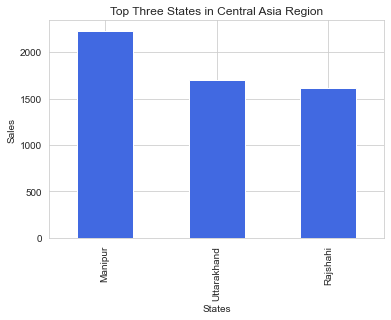

In [47]:
Central_Asia_States_region.groupby("State")["Sales (shipping price included)"].mean().sort_values(ascending=False).head(3).plot.bar(color = "royalblue")
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Top Three States in Central Asia Region")
plt.show()

In [48]:
North_Asia_States_region = dataset[dataset["Region"]=="North Asia"]
North_Asia_States_region.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
1,2015-01-02,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,528.235294,320.823529,323.823529,204.411765,1.0,324.823529,3.0,1
2,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Baby Care,Baby & Kids Gifts,215.686275,142.098039,145.098039,70.588235,0.0,145.098039,3.0,1
7,2015-01-02,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Jewellery,"Bangles, Bracelets & Armlets",122.254902,81.941176,97.941176,24.313725,0.0,97.941176,16.0,1
8,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Retail,Automotive,Car Accessories,100.588235,35.823529,53.823529,46.764706,-1.0,52.823529,18.0,1
10,2015-01-02,Moderate,Named Day,Yingcheng,Hubei,China,North Asia,Retail,Furniture,Living Room Furniture,5372.843137,3148.647059,3152.647059,2220.196078,-1.0,3151.647059,4.0,1


In [49]:
North_Asia_States_region["State"].unique()

array(['Hubei', 'Chongqing', 'Shanxi', 'Shanghai', 'Anhui', 'Henan',
       'Heilongjiang', 'Zhejiang', 'Jiangsu', 'Sichuan', 'Jilin',
       'Guizhou', 'Inner Mongolia', 'Hebei', 'Guangdong', 'Fujian',
       'Tianjin', 'Taipei City', 'Ningxia', 'Hunan', 'Guangxi',
       'Shandong', 'Gansu', 'Yunnan', 'Shaanxi', 'Liaoning', 'Jiangxi',
       'Beijing', 'Hainan', 'Qinghai', 'Xinjiang Uygur'], dtype=object)

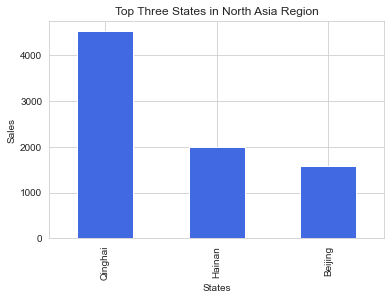

In [50]:
North_Asia_States_region.groupby("State")["Sales (shipping price included)"].mean().sort_values(ascending=False).head(3).plot.bar(color = "royalblue")
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Top Three States in North Asia Region")
plt.show()

In [51]:
Southeast_Asia_States_region = dataset[dataset["Region"]=="Southeast Asia"]
Southeast_Asia_States_region.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
80,2015-01-11,Extreme,Same Day,Singapore,Singapore,Singapore,Southeast Asia,Retail,Baby Care,Baby & Kids Gifts,128.333333,67.274510,71.274510,57.058824,2.0,73.274510,4.0,1
83,2015-01-11,Extreme,Same Day,Singapore,Singapore,Singapore,Southeast Asia,Retail,Baby Care,Baby & Kids Gifts,198.039216,130.333333,133.333333,64.705882,0.0,133.333333,3.0,1
84,2015-01-11,Extreme,Same Day,Singapore,Singapore,Singapore,Southeast Asia,Retail,Baby Care,Baby & Kids Gifts,190.196078,122.450980,127.450980,62.745098,1.0,128.450980,5.0,1
86,2015-01-11,Extreme,Same Day,Singapore,Singapore,Singapore,Southeast Asia,Retail,Jewellery,"Bangles, Bracelets & Armlets",127.450980,48.725490,63.725490,63.725490,2.0,65.725490,15.0,1
88,2015-01-11,Extreme,Same Day,Singapore,Singapore,Singapore,Southeast Asia,Retail,Clothing,Kids' Clothing,337.156863,NaN,235.294118,101.862745,2.0,237.294118,3.0,1


In [52]:
Southeast_Asia_States_region["State"].unique()

array(['Singapore', 'Yangon'], dtype=object)

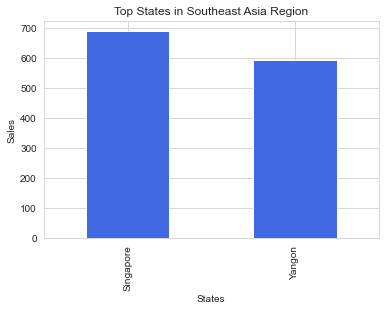

In [53]:
Southeast_Asia_States_region.groupby("State")["Sales (shipping price included)"].mean().sort_values(ascending=False).head().plot.bar(color = "royalblue")
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Top States in Southeast Asia Region")
plt.show()

### Impact of  Shipping cost on profit 

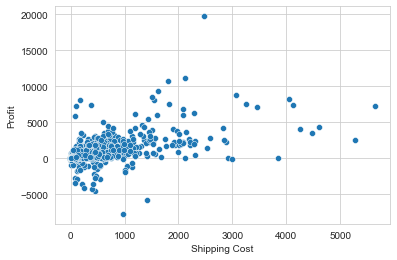

In [54]:
sns.scatterplot(x="Shipping Cost",y="Profit",data=dataset)
plt.show()

###  Categories with higher MRP and  the profit ratio for the same 


In [55]:
dataset["Category"].unique()

array([' Baby & Kids Gifts ', ' Bangles, Bracelets & Armlets ',
       ' Car Accessories ', ' Grooming ', ' Living Room Furniture ',
       ' Necklaces & Chains ', " Women's Clothing ", " Women's Footwear ",
       'Appliances', 'Binders', 'Copiers', 'Labels', 'Storage',
       'Supplies', 'Envelopes', ' Network Components ', 'Tables',
       ' Cushions, Pillows & Covers ', 'Machines', ' School Supplies ',
       'Chairs', 'Phones', " Kids' Clothing ", 'Accessories',
       ' Diaries & Notebooks ', ' Toys ', 'Art', 'Bookcases', ' Bags ',
       ' Office Supplies ', 'Paper', ' Accessories & Spare parts ',
       ' Belts ', ' Curtains & Accessories ', " Men's Clothing ",
       ' Showpiece ', ' Team Sports ', ' Tools ', 'Fasteners',
       'Furnishings', ' Baby Bath & Skin ', ' Bed Linen ',
       ' Mobile Accessories ', ' College Supplies ',
       ' Health & Nutrition ', ' Infant Wear ', ' Other Sports ',
       ' Table Decor & Handicrafts ', ' Living Room Furnishing ',
       ' Musica

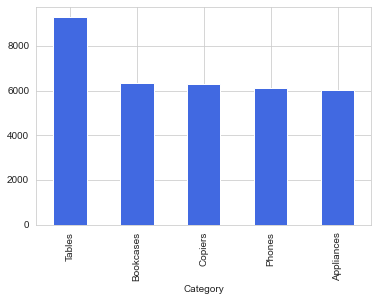

In [56]:
dataset.groupby("Category")["Price"].mean().sort_values(ascending=False).head().plot.bar(color = "royalblue")
plt.show()

In [57]:
df1 = pd.DataFrame(dataset.groupby("Category")["Price"].mean().sort_values(ascending=False).head())
df1

,Price
Category,
Tables,9270.851853
Bookcases,6316.533025
Copiers,6281.775003
Phones,6108.688315
Appliances,6039.635249


In [58]:
df2 = pd.DataFrame(dataset.loc[dataset['Category'].isin(['Tables','Bookcases','Copiers','Phones','Appliances'])])

In [59]:
df2.head()

,Order Date,Order Priority,Ship Type,City,State,Country,Region,Segment,Super Category,Category,Price,Operational/ Production Cost,Selling Price,Discount,Shipping Cost,Sales (shipping price included),Profit,Quantity
24,2015-01-02,Moderate,Named Day,Chongqing,Chongqing,China,North Asia,Corporate,Office Supplies,Appliances,2469.97350,1492.7795,2469.97350,0.000,239.3915,2709.36500,977.19400,4
26,2015-01-02,Moderate,Named Day,Dhaka,Dhaka,Bangladesh,Central Asia,Retail,Technology,Copiers,2038.36780,1523.8338,2031.35780,7.010,401.6730,2426.02080,507.52400,1
43,2015-01-07,Moderate,Named Day,Yuci,Shanxi,China,North Asia,Whole Sale,Furniture,Tables,13301.72736,14449.0120,13299.62436,2.103,1138.7745,14436.29586,-1149.38764,5
44,2015-01-07,Moderate,Named Day,Yuci,Shanxi,China,North Asia,Whole Sale,Furniture,Tables,4396.39160,4831.2920,4387.27860,9.113,632.1618,5010.32740,-444.01340,1
57,2015-01-08,High,Next Day,Shanghai,Shanghai,China,North Asia,Retail,Technology,Copiers,8184.73580,6393.5406,8177.72580,7.010,1296.2892,9467.00500,1784.18520,5


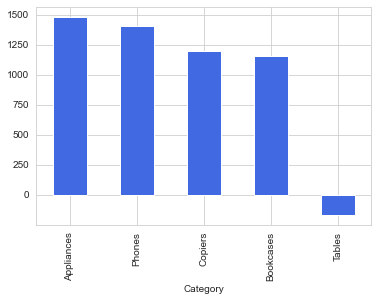

In [60]:
df2.groupby("Category")["Profit"].mean().sort_values(ascending=False).plot.bar(color = "royalblue")
plt.show()